In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [4]:
# Load the dataset
data = pd.read_csv("C:\\Data science\\Assignments\\adult_with_headers.csv")

In [6]:
# 1. Data Exploration and Preprocessing

# 1.1 Basic Data Exploration
print("Dataset Information:")
print(data.info())

print("\nFirst few rows of the dataset:")
print(data.head())

print("\nSummary Statistics:")
print(data.describe(include='all'))

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

First few rows of the dataset:
   age          workclass  fnlwgt  

In [7]:
# 1.2 Handle Missing Values
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [8]:
# 1.3 Apply Scaling Techniques

# Select numerical features
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [9]:
# Standard Scaling
scaler_standard = StandardScaler()
data_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(data[numerical_features]), columns=numerical_features)

In [11]:
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(data[numerical_features]), columns=numerical_features)
print("\nStandard Scaled Data (first 5 rows):")
print(data_standard_scaled.head())

print("\nMin-Max Scaled Data (first 5 rows):")
print(data_minmax_scaled.head())


Standard Scaled Data (first 5 rows):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  

Min-Max Scaled Data (first 5 rows):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000      

In [13]:
# 2. Encoding Techniques

# 2.1 One-Hot Encoding for categorical variables with <5 categories
one_hot_features = ['sex', 'race']
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Updated argument name
one_hot_encoded_data = pd.DataFrame(one_hot_encoder.fit_transform(data[one_hot_features]), 
                                    columns=one_hot_encoder.get_feature_names_out(one_hot_features))



In [14]:
# 2.2 Label Encoding for categorical variables with >5 categories
label_encoded_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']

label_encoder = LabelEncoder()
data_label_encoded = data.copy()
for feature in label_encoded_features:
    data_label_encoded[feature] = label_encoder.fit_transform(data[feature])

print("\nOne-Hot Encoded Data (first 5 rows):")
print(one_hot_encoded_data.head())

print("\nLabel Encoded Data (first 5 rows):")
print(data_label_encoded[label_encoded_features].head())


One-Hot Encoded Data (first 5 rows):
   sex_ Female  sex_ Male  race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  \
0          0.0        1.0                       0.0                       0.0   
1          0.0        1.0                       0.0                       0.0   
2          0.0        1.0                       0.0                       0.0   
3          0.0        1.0                       0.0                       0.0   
4          1.0        0.0                       0.0                       0.0   

   race_ Black  race_ Other  race_ White  
0          0.0          0.0          1.0  
1          0.0          0.0          1.0  
2          0.0          0.0          1.0  
3          1.0          0.0          0.0  
4          1.0          0.0          0.0  

Label Encoded Data (first 5 rows):
   workclass  education  marital_status  occupation  relationship  \
0          7          9               4           1             1   
1          6          9               2    

In [15]:
# 3. Feature Engineering

# 3.1 Create new features
# Example: Age Group
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])

# Example: Hours per week category
data['hours_category'] = pd.cut(data['hours_per_week'], bins=[0, 20, 40, 60, 100], 
                                labels=['Part-time', 'Full-time', 'Over-time', 'Extreme'])

print("\nNew Features Added:")
print(data[['age', 'age_group', 'hours_per_week', 'hours_category']].head())



New Features Added:
   age    age_group  hours_per_week hours_category
0   39  Middle-aged              40      Full-time
1   50  Middle-aged              13      Part-time
2   38  Middle-aged              40      Full-time
3   53       Senior              40      Full-time
4   28        Young              40      Full-time


In [16]:
# 3.2 Apply a transformation to a skewed feature
# Log transformation on capital_gain (which is highly skewed)
data['capital_gain_log'] = np.log1p(data['capital_gain'])

print("\nLog Transformed Capital Gain (first 5 rows):")
print(data[['capital_gain', 'capital_gain_log']].head())



Log Transformed Capital Gain (first 5 rows):
   capital_gain  capital_gain_log
0          2174          7.684784
1             0          0.000000
2             0          0.000000
3             0          0.000000
4             0          0.000000


In [17]:
# 4. Feature Selection

# 4.1 Isolation Forest for Outlier Detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(data[numerical_features])

In [18]:
# Remove outliers
data_cleaned = data[outliers == 1]

print("\nData after removing outliers (first 5 rows):")
print(data_cleaned.head())


Data after removing outliers (first 5 rows):
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  \
0          2174      

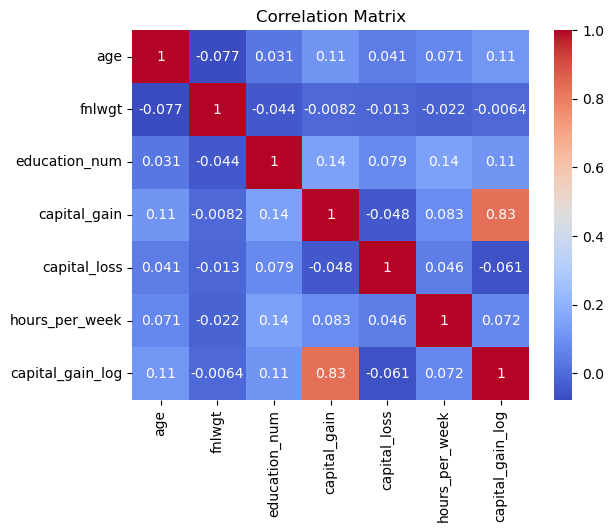

In [20]:
# 4.2 Correlation Matrix

# Select only numerical columns for correlation matrix
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
corr_matrix = data_cleaned[numerical_cols].corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


In [21]:
# 4.3 Chi-Square Test for categorical features
chi2_results = {}
for col in label_encoded_features:
    contingency_table = pd.crosstab(data_cleaned[col], data_cleaned['income'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = p

# Display chi-square test results
print("\nChi-Square Test Results (p-values):")
print(chi2_results)



Chi-Square Test Results (p-values):
{'workclass': 3.540673555333661e-205, 'education': 0.0, 'marital_status': 0.0, 'occupation': 0.0, 'relationship': 0.0, 'native_country': 3.0200581368112616e-42}
